# Decision Tree — Complete Intuitive Walkthrough  

This note introduces the **Decision Tree** algorithm using `scikit‑learn`, explains the step‑by‑step logic behind how it works, and then demonstrates a from‑scratch implementation to show that the core idea is simple and easy to build.

## What is a Decision Tree?

A **Decision Tree** is a flow‑chart full of **yes / no** questions.  
Starting at the root, each question splits the data into smaller groups until every **leaf** is *pure* (all samples inside belong to one class), or a stop condition is met.

The top‑down, greedy procedure we’ll build here uses **Gini impurity**, which is the splitting rule used by the popular **CART** algorithm.

> **CART** stands for **Classification And Regression Trees**. It is the most widely used decision‑tree method, introduced by Breiman et al. in 1984.

In this note, we focus on classification.

This notebook will:

- **Use `scikit‑learn`** to demonstrate how Decision Tree works in practice  
- **Explain the logic behind it** in an intuitive way (Gini impurity, Gini gain, recursive splitting)  
- **Show how to implement the same idea step by step from scratch**  

Let’s dive into the details to understand how it works and how to implement it ourselves.

## Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Load data
X, y = load_iris(return_X_y=True)

## Implement with Scikit-Learn

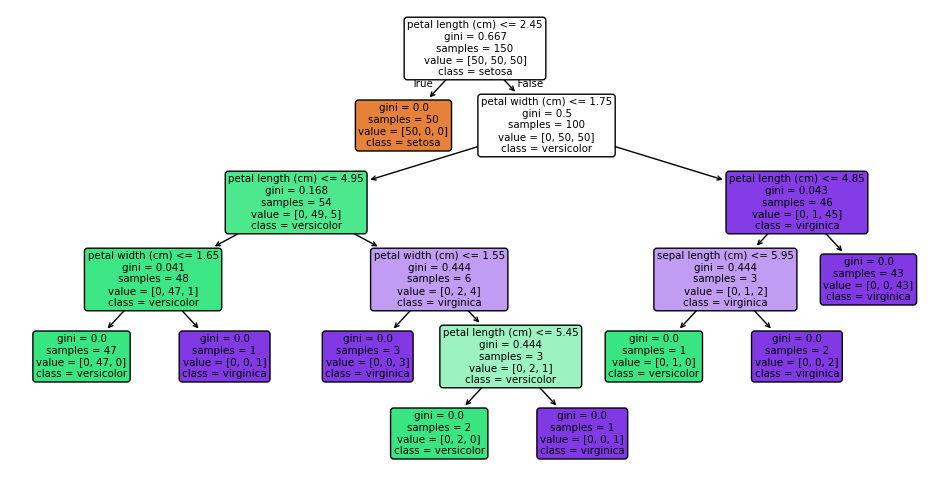

In [ ]:
# Fit Decision Tree (CART w/ Gini)
sk_model = DecisionTreeClassifier(
    criterion="gini",    # <-- Gini impurity (our focus)
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
sk_model.fit(X, y)

# Visualize the trained tree
plt.figure(figsize=(12, 6))
plot_tree(sk_model,
          feature_names=load_iris().feature_names,
          class_names=load_iris().target_names,
          filled=True, rounded=True)
plt.show()

We can see that the decision tree is successfully generated using `plot_tree()`:

For later comparison, we also create a **text-based representation** of the tree using `export_text()`:

In [ ]:
print(export_text(sk_model, feature_names=load_iris().feature_names))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Behind the Scenes

### 1. The Big Picture — Purity vs. Impurity

*Imagine a bucket of marbles where each **color = a class**.*

- If the bucket holds **only blue marbles**, it is **perfectly pure** — you can always guess “blue” and be right.  
- If it holds **half blue, half red**, it is **impure** — your guess will be wrong half the time.

A Decision Tree keeps asking yes / no questions that move us into ever‑purer buckets.  
To decide which question is best, we need a **number** that measures “mixiness.”  
That number is called an **impurity measure**.

> There are several impurity measures (e.g. entropy / information gain).  
> Here we use **Gini impurity** because it’s fast and intuitive.

### 2. Gini Impurity — One Way to Measure Impurity

**Plain language definition:**  
> “Take one marble at random from the bucket and **guess** its color by picking the most frequent color in that bucket.  
> The Gini impurity is the probability your guess is **wrong**.”

- If the bucket is pure (all one color), you’re never wrong → impurity 0.  
- If colors are mixed evenly, you’re often wrong → impurity higher.

**Formula:**  
Let $p_k$ be the **share** of marbles in class $k$ (e.g. 0.5 for 50 %). For $K$ classes:

$$
G \;=\; 1 \;-\; \sum_{k=1}^{K} p_k^2
$$

- All one color ($p_k=1$ for one class):  
  $$G = 1 - 1^2 = 0\quad(\text{pure}).$$
- Two colors evenly mixed ($p_1 = p_2 = 0.5$):  
  $$G = 1 - (0.5^2 + 0.5^2) = 0.5.$$

### 3. Gini Gain — Evaluating a Split

When a question splits the parent bucket into **left** and **right**:

- $N_P$ = number of samples in parent  
- $N_L$, $N_R$ = numbers in left / right children  
- $G_P$ = Gini impurity of the parent  
- $G_L$, $G_R$ = impurities of left / right  

We compute the **weighted average impurity** after the split:

$$
\underbrace{\tfrac{N_L}{N_P}\,G_L}_{\text{left’s impurity × its weight}}
\;+\;
\underbrace{\tfrac{N_R}{N_P}\,G_R}_{\text{right’s impurity × its weight}}
$$

Then the **Gini gain** measures the **drop in impurity**:

$$
\text{Gain} 
\;=\;
G_P
\;-\;
\Bigl(
\tfrac{N_L}{N_P}\,G_L
\;+\;
\tfrac{N_R}{N_P}\,G_R
\Bigr)
$$

- The term in parentheses is the **after-split impurity**.  
- Subtracting it from $G_P$ gives the **impurity reduction**—i.e. how much **clearer** (purer) our buckets became thanks to that question.  
- We choose the split with the **highest gain**.

### 4. Growing the Tree

1. **Root bucket** = all data.  
2. Evaluate every feature + threshold, compute Gini gain, pick the **best**.  
3. Split into **left / right** buckets.  
4. Repeat steps 2–3 **recursively** on each bucket.  
5. **Stop** when a bucket is pure or when limits (`max_depth`, `min_samples_leaf`) are reached.

This greedy, one‑step‑ahead strategy (CART) builds powerful trees quickly.

### 5. Making Predictions

To classify a new sample:

1. Start at the **root**.  
2. Ask the stored yes / no question.  
3. Follow the **yes** or **no** branch.  
4. Repeat until you reach a **leaf**; output that leaf’s class label.

Like playing “20 Questions,” each answer narrows possibilities until one remains.

## Let's Code It

In [ ]:
class MyDecisionTree:
    """
    A minimal CART‑style decision tree using Gini impurity.
    Handles numeric features and multiclass targets.
    """

    def __init__(self, max_depth=None, min_samples_split=2):
        # stopping rules
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        # store number of classes for bincounts
        self.n_classes_ = len(set(y))
        self.root = self._grow(X, y, depth=0)

    def _grow(self, X, y, depth):
        n_samples, n_features = X.shape
        num_labels = len(set(y))

        # 1) stopping: pure node, max depth, or too few samples
        if depth == self.max_depth or num_labels == 1 or n_samples < self.min_samples_split:
            counts = np.bincount(y, minlength=self.n_classes_)
            # leaf predicts majority class
            return {"leaf": True, "label": int(np.argmax(counts))}

        # 2) compute parent Gini
        counts = np.bincount(y, minlength=self.n_classes_)
        p = counts / n_samples
        parent_gini = 1.0 - np.sum(p**2)

        best_gain = -1
        best_feat = None
        best_thr  = None

        # 3) search for best split
        for feat in range(n_features):
            # candidate thresholds = midpoints between unique values
            values = np.unique(X[:, feat])
            thresholds = (values[:-1] + values[1:]) / 2
            for thr in thresholds:
                mask_left = X[:, feat] <= thr
                if mask_left.all() or not mask_left.any():
                    continue  # skip if one side empty

                y_left, y_right = y[mask_left], y[~mask_left]

                # compute Gini left
                counts_l = np.bincount(y_left, minlength=self.n_classes_)
                p_l = counts_l / len(y_left)
                gini_l = 1.0 - np.sum(p_l**2)

                # compute Gini right
                counts_r = np.bincount(y_right, minlength=self.n_classes_)
                p_r = counts_r / len(y_right)
                gini_r = 1.0 - np.sum(p_r**2)

                # weighted average child impurity
                w_l = len(y_left) / n_samples
                w_r = len(y_right) / n_samples
                child_impurity = w_l * gini_l + w_r * gini_r

                # Gini gain = parent - children
                gain = parent_gini - child_impurity

                if gain > best_gain:
                    best_gain, best_feat, best_thr = gain, feat, thr

        # no valid split → leaf
        if best_gain == -1:
            counts = np.bincount(y, minlength=self.n_classes_)
            return {"leaf": True, "label": int(np.argmax(counts))}

        # 4) split and recurse
        mask_left = X[:, best_feat] <= best_thr
        left_node  = self._grow(X[mask_left],  y[mask_left],  depth + 1)
        right_node = self._grow(X[~mask_left], y[~mask_left], depth + 1)

        return {
            "leaf":  False,
            "feat":  best_feat,
            "thr":   best_thr,
            "left":  left_node,
            "right": right_node
        }

    def predict(self, X):
        return np.array([self._predict_one(x, self.root) for x in X])

    def _predict_one(self, x, node):
        if node["leaf"]:
            return node["label"]
        if x[node["feat"]] <= node["thr"]:
            return self._predict_one(x, node["left"])
        else:
            return self._predict_one(x, node["right"])


my_model = MyDecisionTree(max_depth=None, min_samples_split=2)
my_model.fit(X, y)

def print_tree(node, feature_names, indent=""):
    if node["leaf"]:
        # Leaf: print class label
        print(f"{indent}|--- class: {node['label']}")
        return

    name = feature_names[node["feat"]]
    thr  = node["thr"]

    # Left branch: <= threshold
    print(f"{indent}|--- {name} <= {thr:.2f}")
    print_tree(node["left"], feature_names, indent + "|   ")

    # Right branch: > threshold
    print(f"{indent}|--- {name} >  {thr:.2f}")
    print_tree(node["right"], feature_names, indent + "|   ")

print_tree(my_model.root, load_iris().feature_names)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2


## It Works!!

The predictions from our scratch **Decision Tree (CART w/ Gini)** implementation match those from **scikit‑learn** exactly.

This confirms that our logic — computing Gini impurity, selecting optimal feature splits, recursively building the tree, and predicting by majority vote in the leaves — behaves as expected.

We've successfully built **Decision Tree** from the ground up!